# 2. Limpieza y Preparación de Datos

## Objetivo
Dejar los datos analizables y defendibles mediante:
- Validación de variables clave
- Tratamiento de valores faltantes
- Creación de nuevas variables derivadas

## Fuente de datos
Dataset unificado generado en la Etapa 1: `nacimientos_2009_2022.csv`

---

## 2.0 Importación de librerías y carga de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


In [4]:
# Cargar dataset unificado
DATA_PATH = Path('../data/processed')
df = pd.read_csv(DATA_PATH / 'nacimientos_2009_2022.csv')

print(f"Dataset cargado: {len(df):,} registros, {len(df.columns)} variables")
print(f"\nVariables disponibles:")
print(df.columns.tolist())

Dataset cargado: 5,195,195 registros, 25 variables

Variables disponibles:
['Diaocu', 'Depnap', 'Sexo', 'Depreg', 'Deprep', 'Tohivi', 'Depocu', 'Edadp', 'Deprem', 'Mesreg', 'Mupocu', 'Tohinm', 'Tipar', 'Mesocu', 'Escivp', 'Libras', 'Tohite', 'Onzas', 'Añoreg', 'Asisrec', 'Depnam', 'Sitioocu', 'Escivm', 'Edadm', 'Añoocu']


In [5]:
# Guardar número inicial de registros para tracking
n_inicial = len(df)
print(f"Registros iniciales: {n_inicial:,}")

# Vista previa
df.head()

Registros iniciales: 5,195,195


,Diaocu,Depnap,Sexo,Depreg,Deprep,Tohivi,Depocu,Edadp,Deprem,Mesreg,Mupocu,Tohinm,Tipar,Mesocu,Escivp,Libras,Tohite,Onzas,Añoreg,Asisrec,Depnam,Sitioocu,Escivm,Edadm,Añoocu
0,28.0,1.0,1.0,1.0,1.0,2.0,1.0,30.0,1.0,8.0,101.0,0.0,1.0,6.0,1.0,5.0,2.0,2.0,9.0,1.0,1.0,4.0,2.0,28.0,2009.0
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,23.0,1.0,3.0,101.0,0.0,1.0,4.0,2.0,5.0,1.0,6.0,10.0,1.0,1.0,4.0,2.0,18.0,2009.0
2,30.0,1.0,2.0,1.0,1.0,3.0,1.0,32.0,1.0,2.0,101.0,0.0,1.0,1.0,2.0,5.0,3.0,10.0,9.0,1.0,1.0,4.0,2.0,40.0,2009.0
3,7.0,1.0,2.0,1.0,1.0,2.0,1.0,30.0,1.0,1.0,101.0,0.0,1.0,9.0,1.0,6.0,2.0,0.0,10.0,1.0,1.0,4.0,1.0,28.0,2009.0
4,10.0,1.0,1.0,1.0,1.0,2.0,1.0,33.0,1.0,7.0,101.0,0.0,1.0,7.0,1.0,6.0,2.0,10.0,9.0,1.0,1.0,4.0,1.0,34.0,2009.0


---
## 2.1 Validación de Variables Clave

Analizaremos las variables más importantes para el estudio y eliminaremos valores imposibles o claramente erróneos.

### 2.1.1 Edad de la Madre (Edadm)

**Criterios de validación:**
- Edad mínima biológicamente posible: 10 años
- Edad máxima razonable: 55 años
- Valores fuera de este rango se consideran errores de registro

In [6]:
print("="*60)
print("ANÁLISIS DE EDAD DE LA MADRE (Edadm)")
print("="*60)

# Estadísticas descriptivas
print("\n📊 Estadísticas descriptivas:")
print(df['Edadm'].describe())

# Valores faltantes
na_edadm = df['Edadm'].isna().sum()
print(f"\n📌 Valores faltantes: {na_edadm:,} ({na_edadm/len(df)*100:.2f}%)")

# Distribución de valores extremos
print("\n📌 Valores extremos:")
print(f"   Menores de 10 años: {(df['Edadm'] < 10).sum():,}")
print(f"   Entre 10-14 años: {((df['Edadm'] >= 10) & (df['Edadm'] <= 14)).sum():,}")
print(f"   Entre 15-19 años: {((df['Edadm'] >= 15) & (df['Edadm'] <= 19)).sum():,}")
print(f"   Entre 20-34 años: {((df['Edadm'] >= 20) & (df['Edadm'] <= 34)).sum():,}")
print(f"   Entre 35-44 años: {((df['Edadm'] >= 35) & (df['Edadm'] <= 44)).sum():,}")
print(f"   Entre 45-55 años: {((df['Edadm'] >= 45) & (df['Edadm'] <= 55)).sum():,}")
print(f"   Mayores de 55 años: {(df['Edadm'] > 55).sum():,}")

ANÁLISIS DE EDAD DE LA MADRE (Edadm)

📊 Estadísticas descriptivas:
count    5.195195e+06
mean     2.810985e+01
std      4.947931e+01
min      1.000000e+01
25%      2.000000e+01
50%      2.500000e+01
75%      3.000000e+01
max      9.990000e+02
Name: Edadm, dtype: float64

📌 Valores faltantes: 0 (0.00%)

📌 Valores extremos:
   Menores de 10 años: 0
   Entre 10-14 años: 30,407
   Entre 15-19 años: 971,638
   Entre 20-34 años: 3,584,033
   Entre 35-44 años: 581,865
   Entre 45-55 años: 13,781
   Mayores de 55 años: 13,471


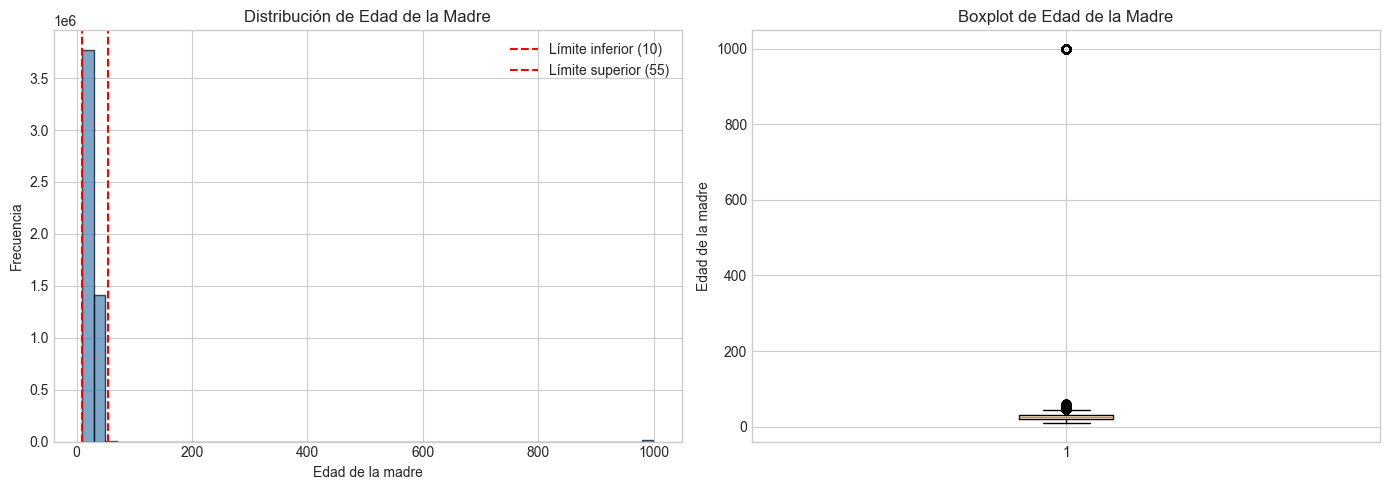

In [7]:
# Visualización de la distribución de edad
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['Edadm'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=10, color='red', linestyle='--', label='Límite inferior (10)')
axes[0].axvline(x=55, color='red', linestyle='--', label='Límite superior (55)')
axes[0].set_xlabel('Edad de la madre')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Edad de la Madre')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['Edadm'].dropna(), vert=True)
axes[1].set_ylabel('Edad de la madre')
axes[1].set_title('Boxplot de Edad de la Madre')

plt.tight_layout()
plt.show()

In [8]:
# Identificar y documentar registros con edades inválidas
edades_invalidas = (df['Edadm'] < 10) | (df['Edadm'] > 55)
n_invalidos_edad = edades_invalidas.sum()

print(f"\n⚠️ REGISTROS CON EDAD INVÁLIDA: {n_invalidos_edad:,} ({n_invalidos_edad/len(df)*100:.4f}%)")

if n_invalidos_edad > 0:
    print("\nDetalle de edades inválidas:")
    print(df.loc[edades_invalidas, 'Edadm'].value_counts().sort_index())


⚠️ REGISTROS CON EDAD INVÁLIDA: 13,471 (0.2593%)

Detalle de edades inválidas:
Edadm
56.0        93
57.0        68
58.0        60
59.0        30
999.0    13220
Name: count, dtype: int64


In [9]:
# DECISIÓN: Marcar edades inválidas como NaN (no eliminar registros aún)
df.loc[edades_invalidas, 'Edadm'] = np.nan

print("✓ Edades fuera del rango [10-55] marcadas como valores faltantes")
print(f"  Registros afectados: {n_invalidos_edad:,}")

✓ Edades fuera del rango [10-55] marcadas como valores faltantes
  Registros afectados: 13,471


### 2.1.2 Peso al Nacer (Libras + Onzas)

**Proceso:**
1. Convertir Libras + Onzas a gramos
2. Identificar valores imposibles
3. Clasificar según estándares de la OMS

**Criterios de validación:**
- Peso mínimo viable: 500 gramos
- Peso máximo razonable: 6,000 gramos (6 kg)
- Peso normal: 2,500 - 4,000 gramos

In [10]:
print("="*60)
print("ANÁLISIS DE PESO AL NACER (Libras + Onzas)")
print("="*60)

# Estadísticas de Libras y Onzas
print("\n📊 Estadísticas de Libras:")
print(df['Libras'].describe())

print("\n📊 Estadísticas de Onzas:")
print(df['Onzas'].describe())

ANÁLISIS DE PESO AL NACER (Libras + Onzas)

📊 Estadísticas de Libras:
count    5.195195e+06
mean     6.559900e+00
std      3.464949e+00
min      0.000000e+00
25%      6.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      9.900000e+01
Name: Libras, dtype: float64

📊 Estadísticas de Onzas:
count    5.195195e+06
mean     4.759632e+00
std      5.676812e+00
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      9.900000e+01
Name: Onzas, dtype: float64


In [11]:
# Crear variable de peso en gramos
# 1 libra = 453.592 gramos
# 1 onza = 28.3495 gramos

df['Peso_gramos'] = (df['Libras'] * 453.592) + (df['Onzas'] * 28.3495)

print("✓ Variable 'Peso_gramos' creada")
print("\n📊 Estadísticas del peso en gramos:")
print(df['Peso_gramos'].describe())

✓ Variable 'Peso_gramos' creada

📊 Estadísticas del peso en gramos:
count    5.195195e+06
mean     3.110451e+03
std      1.654221e+03
min      2.834950e+02
25%      2.721552e+03
50%      3.090095e+03
75%      3.373590e+03
max      4.771221e+04
Name: Peso_gramos, dtype: float64


In [12]:
# Análisis de valores extremos de peso
print("\n📌 Distribución por rangos de peso:")
print(f"   Menos de 500g (inviable): {(df['Peso_gramos'] < 500).sum():,}")
print(f"   500-1499g (muy bajo peso): {((df['Peso_gramos'] >= 500) & (df['Peso_gramos'] < 1500)).sum():,}")
print(f"   1500-2499g (bajo peso): {((df['Peso_gramos'] >= 1500) & (df['Peso_gramos'] < 2500)).sum():,}")
print(f"   2500-3999g (normal): {((df['Peso_gramos'] >= 2500) & (df['Peso_gramos'] < 4000)).sum():,}")
print(f"   4000-5999g (macrosomía): {((df['Peso_gramos'] >= 4000) & (df['Peso_gramos'] < 6000)).sum():,}")
print(f"   6000g o más (posible error): {(df['Peso_gramos'] >= 6000).sum():,}")

# Valores faltantes
na_peso = df['Peso_gramos'].isna().sum()
print(f"\n📌 Valores faltantes en peso: {na_peso:,} ({na_peso/len(df)*100:.2f}%)")


📌 Distribución por rangos de peso:
   Menos de 500g (inviable): 1,494
   500-1499g (muy bajo peso): 31,987
   1500-2499g (bajo peso): 602,290
   2500-3999g (normal): 4,394,837
   4000-5999g (macrosomía): 158,092
   6000g o más (posible error): 6,495

📌 Valores faltantes en peso: 0 (0.00%)


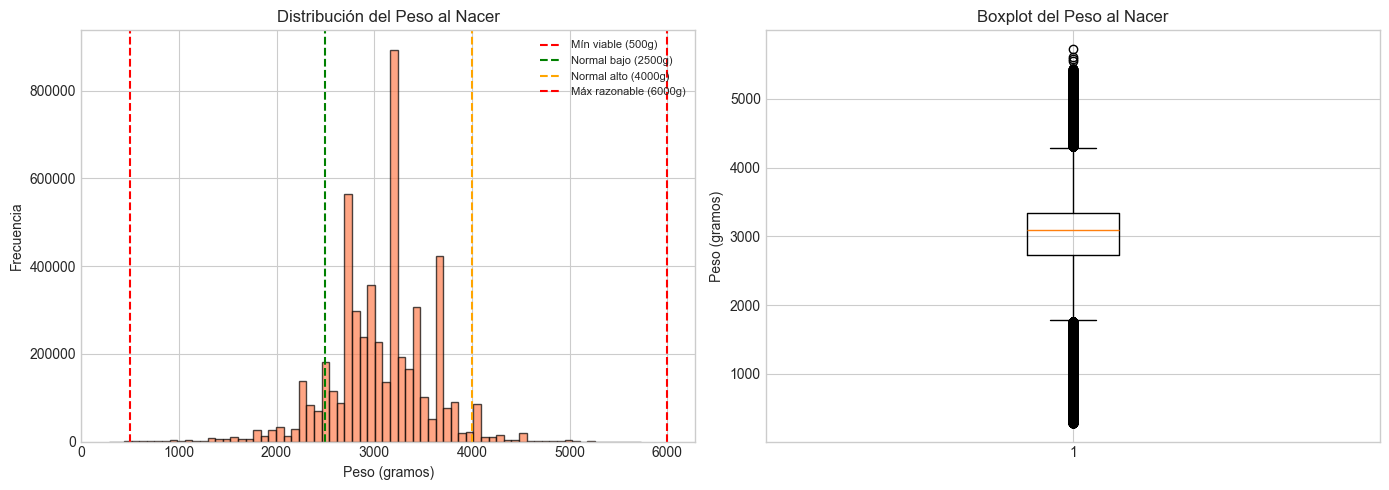

In [13]:
# Visualización de la distribución de peso
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
peso_valido = df['Peso_gramos'].dropna()
peso_valido = peso_valido[(peso_valido >= 0) & (peso_valido <= 7000)]  # Para mejor visualización

axes[0].hist(peso_valido, bins=70, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(x=500, color='red', linestyle='--', label='Mín viable (500g)')
axes[0].axvline(x=2500, color='green', linestyle='--', label='Normal bajo (2500g)')
axes[0].axvline(x=4000, color='orange', linestyle='--', label='Normal alto (4000g)')
axes[0].axvline(x=6000, color='red', linestyle='--', label='Máx razonable (6000g)')
axes[0].set_xlabel('Peso (gramos)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Peso al Nacer')
axes[0].legend(fontsize=8)

# Boxplot
axes[1].boxplot(peso_valido, vert=True)
axes[1].set_ylabel('Peso (gramos)')
axes[1].set_title('Boxplot del Peso al Nacer')

plt.tight_layout()
plt.show()

In [14]:
# Identificar pesos inválidos
peso_invalido = (df['Peso_gramos'] < 500) | (df['Peso_gramos'] > 6000)
n_invalidos_peso = peso_invalido.sum()

print(f"\n⚠️ REGISTROS CON PESO INVÁLIDO: {n_invalidos_peso:,} ({n_invalidos_peso/len(df)*100:.4f}%)")

# DECISIÓN: Marcar pesos inválidos como NaN
df.loc[peso_invalido, 'Peso_gramos'] = np.nan

print("✓ Pesos fuera del rango [500-6000]g marcados como valores faltantes")


⚠️ REGISTROS CON PESO INVÁLIDO: 7,989 (0.1538%)
✓ Pesos fuera del rango [500-6000]g marcados como valores faltantes


### 2.1.3 Total de Hijos Tenidos (Tohite)

**Criterios de validación:**
- Mínimo: 1 (el nacimiento actual)
- Máximo razonable: 20 hijos

In [15]:
print("="*60)
print("ANÁLISIS DE TOTAL DE HIJOS TENIDOS (Tohite)")
print("="*60)

print("\n📊 Estadísticas descriptivas:")
print(df['Tohite'].describe())

# Valores faltantes
na_tohite = df['Tohite'].isna().sum()
print(f"\n📌 Valores faltantes: {na_tohite:,} ({na_tohite/len(df)*100:.2f}%)")

# Distribución
print("\n📌 Distribución de número de hijos:")
print(df['Tohite'].value_counts().sort_index().head(25))

ANÁLISIS DE TOTAL DE HIJOS TENIDOS (Tohite)

📊 Estadísticas descriptivas:
count    5.195195e+06
mean     3.914197e+00
std      1.116254e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      9.900000e+01
Name: Tohite, dtype: float64

📌 Valores faltantes: 0 (0.00%)

📌 Distribución de número de hijos:
Tohite
1.0     1832473
2.0     1299259
3.0      807731
4.0      438407
5.0      266081
6.0      175823
7.0      116993
8.0       78919
9.0       48478
10.0      30767
11.0      16181
12.0       9394
13.0       3901
14.0       1505
15.0        586
16.0        209
17.0         74
18.0         14
19.0          2
99.0      68398
Name: count, dtype: int64


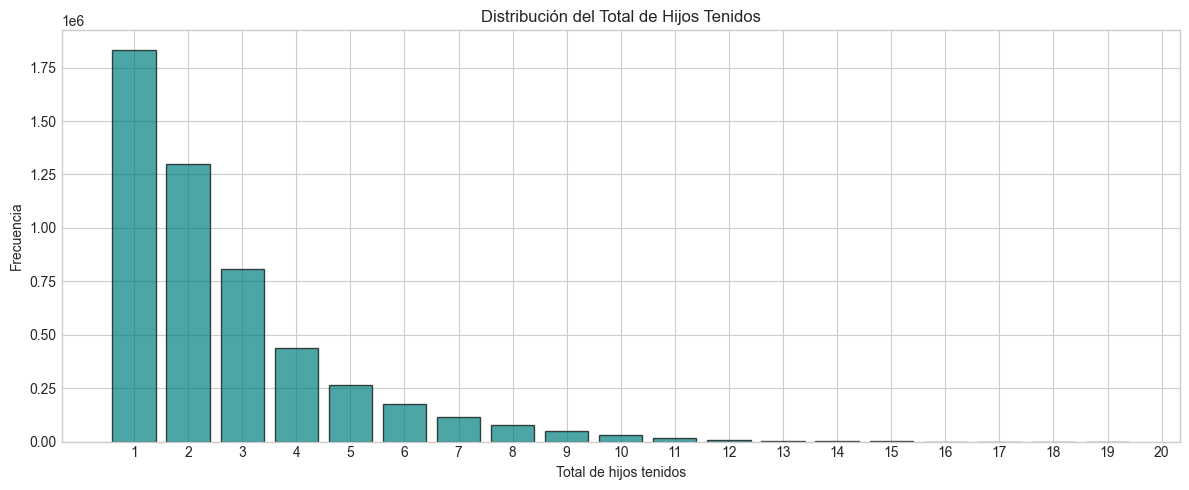

In [16]:
# Visualización
fig, ax = plt.subplots(figsize=(12, 5))

tohite_counts = df['Tohite'].value_counts().sort_index()
tohite_counts = tohite_counts[tohite_counts.index <= 20]  # Mostrar hasta 20

ax.bar(tohite_counts.index, tohite_counts.values, color='teal', edgecolor='black', alpha=0.7)
ax.set_xlabel('Total de hijos tenidos')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución del Total de Hijos Tenidos')
ax.set_xticks(range(1, 21))

plt.tight_layout()
plt.show()

In [17]:
# Identificar valores extremos
tohite_extremo = (df['Tohite'] < 1) | (df['Tohite'] > 20)
n_extremos_tohite = tohite_extremo.sum()

print(f"\n⚠️ REGISTROS CON TOHITE INVÁLIDO: {n_extremos_tohite:,} ({n_extremos_tohite/len(df)*100:.4f}%)")

if n_extremos_tohite > 0:
    print("\nValores extremos encontrados:")
    print(df.loc[tohite_extremo, 'Tohite'].value_counts().sort_index())

# DECISIÓN: Marcar valores extremos como NaN
df.loc[tohite_extremo, 'Tohite'] = np.nan
print("\n✓ Valores de Tohite fuera del rango [1-20] marcados como faltantes")


⚠️ REGISTROS CON TOHITE INVÁLIDO: 68,398 (1.3166%)

Valores extremos encontrados:
Tohite
99.0    68398
Name: count, dtype: int64

✓ Valores de Tohite fuera del rango [1-20] marcados como faltantes


### 2.1.4 Validación de Año de Ocurrencia (Añoocu)

In [18]:
print("="*60)
print("VALIDACIÓN DE AÑO DE OCURRENCIA (Añoocu)")
print("="*60)

print("\n📊 Distribución por año:")
print(df['Añoocu'].value_counts().sort_index())

# Verificar que todos los años estén en el rango esperado
años_validos = (df['Añoocu'] >= 2009) & (df['Añoocu'] <= 2022)
años_invalidos = ~años_validos & df['Añoocu'].notna()

print(f"\n✓ Registros con año válido (2009-2022): {años_validos.sum():,}")
print(f"⚠️ Registros con año inválido: {años_invalidos.sum():,}")

VALIDACIÓN DE AÑO DE OCURRENCIA (Añoocu)

📊 Distribución por año:
Añoocu
2009.0    351628
2010.0    361906
2011.0    373692
2012.0    388613
2013.0    387342
2014.0    386195
2015.0    391425
2016.0    390382
2017.0    381664
2018.0    383263
2019.0    366855
2020.0    341212
2021.0    345149
2022.0    345869
Name: count, dtype: int64

✓ Registros con año válido (2009-2022): 5,195,195
⚠️ Registros con año inválido: 0


---
## 2.2 Tratamiento de Valores Faltantes

Analizaremos el patrón de valores faltantes y tomaremos decisiones documentadas.

In [19]:
print("="*60)
print("ANÁLISIS DE VALORES FALTANTES POR VARIABLE")
print("="*60)

# Calcular valores faltantes por variable
na_por_variable = df.isna().sum().sort_values(ascending=False)
na_porcentaje = (na_por_variable / len(df) * 100).round(2)

# Crear tabla resumen
resumen_na = pd.DataFrame({
    'Faltantes': na_por_variable,
    'Porcentaje (%)': na_porcentaje
})

print("\n📊 Resumen de valores faltantes:")
print(resumen_na[resumen_na['Faltantes'] > 0])

ANÁLISIS DE VALORES FALTANTES POR VARIABLE

📊 Resumen de valores faltantes:
             Faltantes  Porcentaje (%)
Tohite           68398            1.32
Edadm            13471            0.26
Peso_gramos       7989            0.15


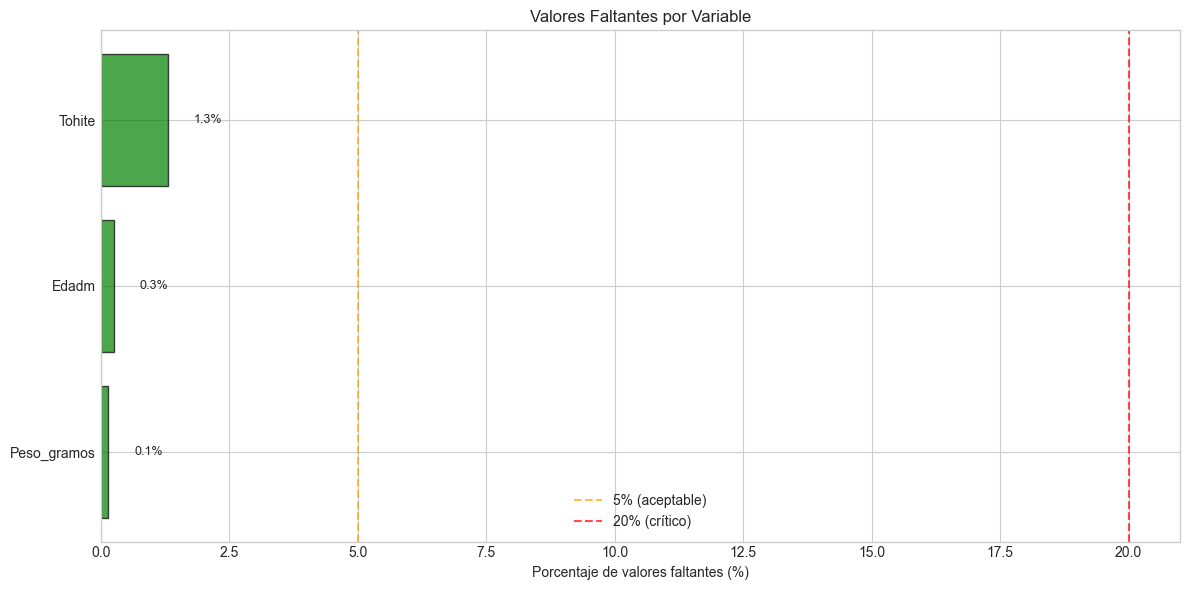

In [20]:
# Visualización de valores faltantes
fig, ax = plt.subplots(figsize=(12, 6))

na_plot = na_porcentaje[na_porcentaje > 0].sort_values(ascending=True)

colors = ['green' if x < 5 else 'orange' if x < 20 else 'red' for x in na_plot.values]
bars = ax.barh(na_plot.index, na_plot.values, color=colors, edgecolor='black', alpha=0.7)

ax.set_xlabel('Porcentaje de valores faltantes (%)')
ax.set_title('Valores Faltantes por Variable')
ax.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='5% (aceptable)')
ax.axvline(x=20, color='red', linestyle='--', alpha=0.7, label='20% (crítico)')
ax.legend()

# Añadir etiquetas de valor
for bar, val in zip(bars, na_plot.values):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [21]:
# Decisiones sobre valores faltantes
print("="*60)
print("DECISIONES SOBRE VALORES FALTANTES")
print("="*60)

print("""
📋 CRITERIOS DE DECISIÓN:

1. Variables con < 5% de faltantes:
   → Se mantienen los registros, análisis con datos disponibles
   
2. Variables con 5-20% de faltantes:
   → Evaluar si son críticas para el análisis
   → Documentar el impacto potencial
   
3. Variables con > 20% de faltantes:
   → Considerar exclusión de la variable
   → O análisis separado con submuestra

📋 DECISIONES ESPECÍFICAS:

• Edadm (Edad madre): Variable crítica para el análisis
  → Mantener, excluir solo registros sin edad en análisis específicos
  
• Edadp (Edad padre): Alta proporción de faltantes esperada
  → No es variable central, se mantiene para análisis opcionales
  
• Peso (Libras/Onzas): Variable importante
  → Mantener, reportar proporción de datos válidos
  
• Variables territoriales: Críticas para análisis espacial
  → Mantener registros con información completa
""")

DECISIONES SOBRE VALORES FALTANTES

📋 CRITERIOS DE DECISIÓN:

1. Variables con < 5% de faltantes:
   → Se mantienen los registros, análisis con datos disponibles

2. Variables con 5-20% de faltantes:
   → Evaluar si son críticas para el análisis
   → Documentar el impacto potencial

3. Variables con > 20% de faltantes:
   → Considerar exclusión de la variable
   → O análisis separado con submuestra

📋 DECISIONES ESPECÍFICAS:

• Edadm (Edad madre): Variable crítica para el análisis
  → Mantener, excluir solo registros sin edad en análisis específicos

• Edadp (Edad padre): Alta proporción de faltantes esperada
  → No es variable central, se mantiene para análisis opcionales

• Peso (Libras/Onzas): Variable importante
  → Mantener, reportar proporción de datos válidos

• Variables territoriales: Críticas para análisis espacial
  → Mantener registros con información completa



In [22]:
# Crear indicador de completitud para variables clave
variables_clave = ['Edadm', 'Peso_gramos', 'Deprem', 'Añoocu', 'Sexo']

df['registro_completo'] = df[variables_clave].notna().all(axis=1)

n_completos = df['registro_completo'].sum()
print(f"\n📊 Registros con variables clave completas: {n_completos:,} ({n_completos/len(df)*100:.2f}%)")
print(f"   Registros con algún faltante en variables clave: {len(df) - n_completos:,}")


📊 Registros con variables clave completas: 5,174,401 (99.60%)
   Registros con algún faltante en variables clave: 20,794


---
## 2.3 Creación de Variables Nuevas

Crearemos variables derivadas que faciliten el análisis exploratorio.

### 2.3.1 Grupo de Edad de la Madre

**Categorías según estándares demográficos:**
- **Adolescente:** 10-19 años
- **Adulta joven:** 20-34 años  
- **Adulta:** 35-55 años

In [23]:
# Crear grupos de edad de la madre
def clasificar_edad_madre(edad):
    if pd.isna(edad):
        return np.nan
    elif edad < 20:
        return 'Adolescente (10-19)'
    elif edad < 35:
        return 'Adulta joven (20-34)'
    else:
        return 'Adulta (35-55)'

df['Grupo_edad_madre'] = df['Edadm'].apply(clasificar_edad_madre)

print("✓ Variable 'Grupo_edad_madre' creada")
print("\n📊 Distribución:")
print(df['Grupo_edad_madre'].value_counts())
print("\n📊 Distribución porcentual:")
print((df['Grupo_edad_madre'].value_counts(normalize=True) * 100).round(2))

✓ Variable 'Grupo_edad_madre' creada

📊 Distribución:
Grupo_edad_madre
Adulta joven (20-34)    3584033
Adolescente (10-19)     1002045
Adulta (35-55)           595646
Name: count, dtype: int64

📊 Distribución porcentual:
Grupo_edad_madre
Adulta joven (20-34)    69.17
Adolescente (10-19)     19.34
Adulta (35-55)          11.50
Name: proportion, dtype: float64


In [24]:
# También crear una versión más detallada
def clasificar_edad_detallada(edad):
    if pd.isna(edad):
        return np.nan
    elif edad < 15:
        return '10-14'
    elif edad < 20:
        return '15-19'
    elif edad < 25:
        return '20-24'
    elif edad < 30:
        return '25-29'
    elif edad < 35:
        return '30-34'
    elif edad < 40:
        return '35-39'
    elif edad < 45:
        return '40-44'
    else:
        return '45-55'

df['Grupo_edad_detallado'] = df['Edadm'].apply(clasificar_edad_detallada)

print("✓ Variable 'Grupo_edad_detallado' creada")
print("\n📊 Distribución:")
print(df['Grupo_edad_detallado'].value_counts())

✓ Variable 'Grupo_edad_detallado' creada

📊 Distribución:
Grupo_edad_detallado
20-24    1553805
25-29    1215316
15-19     971638
30-34     814912
35-39     442792
40-44     139073
10-14      30407
45-55      13781
Name: count, dtype: int64


### 2.3.2 Peso Categorizado

**Categorías según clasificación OMS:**
- **Muy bajo peso:** < 1,500 g
- **Bajo peso:** 1,500 - 2,499 g
- **Normal:** 2,500 - 3,999 g
- **Macrosomía:** ≥ 4,000 g

In [25]:
# Crear categorías de peso
def clasificar_peso(peso):
    if pd.isna(peso):
        return np.nan
    elif peso < 1500:
        return 'Muy bajo peso (<1500g)'
    elif peso < 2500:
        return 'Bajo peso (1500-2499g)'
    elif peso < 4000:
        return 'Normal (2500-3999g)'
    else:
        return 'Macrosomía (≥4000g)'

df['Categoria_peso'] = df['Peso_gramos'].apply(clasificar_peso)

print("✓ Variable 'Categoria_peso' creada")
print("\n📊 Distribución:")
print(df['Categoria_peso'].value_counts())
print("\n📊 Distribución porcentual:")
print((df['Categoria_peso'].value_counts(normalize=True) * 100).round(2))

✓ Variable 'Categoria_peso' creada

📊 Distribución:
Categoria_peso
Normal (2500-3999g)       4394837
Bajo peso (1500-2499g)     602290
Macrosomía (≥4000g)        158092
Muy bajo peso (<1500g)      31987
Name: count, dtype: int64

📊 Distribución porcentual:
Categoria_peso
Normal (2500-3999g)       84.72
Bajo peso (1500-2499g)    11.61
Macrosomía (≥4000g)        3.05
Muy bajo peso (<1500g)     0.62
Name: proportion, dtype: float64


In [26]:
# Crear variable binaria de bajo peso
df['Bajo_peso'] = (df['Peso_gramos'] < 2500).astype(float)
df.loc[df['Peso_gramos'].isna(), 'Bajo_peso'] = np.nan

print("✓ Variable 'Bajo_peso' creada (1=bajo peso, 0=normal o alto)")
print(f"\n📊 Proporción de bajo peso: {df['Bajo_peso'].mean()*100:.2f}%")

✓ Variable 'Bajo_peso' creada (1=bajo peso, 0=normal o alto)

📊 Proporción de bajo peso: 12.23%


### 2.3.3 Área Geográfica Codificada

Revisaremos la variable de área geográfica y crearemos una versión codificada.

In [27]:
# Revisar si existe variable de área geográfica
print("="*60)
print("ANÁLISIS DE ÁREA GEOGRÁFICA")
print("="*60)

# Buscar variables relacionadas con área
vars_area = [col for col in df.columns if 'area' in col.lower() or 'areag' in col.lower()]
print(f"\nVariables de área encontradas: {vars_area}")

# Si no existe, la podemos inferir del municipio o crear basada en departamento
if 'Areag' in df.columns:
    print("\n📊 Distribución de Área Geográfica (Areag):")
    print(df['Areag'].value_counts())
else:
    print("\n⚠️ Variable 'Areag' no encontrada en el dataset")

ANÁLISIS DE ÁREA GEOGRÁFICA

Variables de área encontradas: []

⚠️ Variable 'Areag' no encontrada en el dataset


In [28]:
# Crear variable de área urbana/rural codificada
# Normalmente: 1 = Urbano, 2 = Rural (según codificación INE Guatemala)

if 'Areag' in df.columns:
    def codificar_area(area):
        if pd.isna(area):
            return np.nan
        elif area == 1:
            return 'Urbana'
        elif area == 2:
            return 'Rural'
        else:
            return 'Desconocida'
    
    df['Area_geografica'] = df['Areag'].apply(codificar_area)
    
    print("✓ Variable 'Area_geografica' creada")
    print("\n📊 Distribución:")
    print(df['Area_geografica'].value_counts())
    print("\n📊 Distribución porcentual:")
    print((df['Area_geografica'].value_counts(normalize=True) * 100).round(2))
else:
    print("⚠️ No se puede crear Area_geografica sin variable Areag")

⚠️ No se puede crear Area_geografica sin variable Areag


### 2.3.4 Variables Adicionales Útiles

In [29]:
# Crear variable de sexo codificada
def codificar_sexo(sexo):
    if pd.isna(sexo):
        return np.nan
    elif sexo == 1:
        return 'Masculino'
    elif sexo == 2:
        return 'Femenino'
    else:
        return 'Indeterminado'

df['Sexo_nombre'] = df['Sexo'].apply(codificar_sexo)

print("✓ Variable 'Sexo_nombre' creada")
print("\n📊 Distribución:")
print(df['Sexo_nombre'].value_counts())

✓ Variable 'Sexo_nombre' creada

📊 Distribución:
Sexo_nombre
Masculino    2639432
Femenino     2555763
Name: count, dtype: int64


In [30]:
# Crear variable de tipo de parto codificada
def codificar_tipo_parto(tipar):
    if pd.isna(tipar):
        return np.nan
    elif tipar == 1:
        return 'Simple'
    elif tipar == 2:
        return 'Doble'
    elif tipar == 3:
        return 'Triple o más'
    else:
        return 'Otro'

df['Tipo_parto'] = df['Tipar'].apply(codificar_tipo_parto)

print("✓ Variable 'Tipo_parto' creada")
print("\n📊 Distribución:")
print(df['Tipo_parto'].value_counts())

✓ Variable 'Tipo_parto' creada

📊 Distribución:
Tipo_parto
Simple          5133336
Doble             60845
Triple o más        919
Otro                 95
Name: count, dtype: int64


In [31]:
# Crear indicador de madre adolescente
df['Madre_adolescente'] = (df['Edadm'] < 20).astype(float)
df.loc[df['Edadm'].isna(), 'Madre_adolescente'] = np.nan

print("✓ Variable 'Madre_adolescente' creada (1=sí, 0=no)")
print(f"\n📊 Proporción de madres adolescentes: {df['Madre_adolescente'].mean()*100:.2f}%")

✓ Variable 'Madre_adolescente' creada (1=sí, 0=no)

📊 Proporción de madres adolescentes: 19.34%


In [ ]:
# Crear indicador de madre de 35 años o más
df['Madre_35_mas'] = (df['Edadm'] >= 35).astype(float)
df.loc[df['Edadm'].isna(), 'Madre_35_mas'] = np.nan

print("✓ Variable 'Madre_35_mas' creada (1=sí, 0=no)")
print(f"\n📊 Proporción de madres de 35+ años: {df['Madre_35_mas'].mean()*100:.2f}%")

✓ Variable 'Madre_anosa' creada (1=sí, 0=no)

📊 Proporción de madres de 35+ años: 11.50%


In [33]:
# Crear indicador de primer hijo
df['Primer_hijo'] = (df['Tohite'] == 1).astype(float)
df.loc[df['Tohite'].isna(), 'Primer_hijo'] = np.nan

print("✓ Variable 'Primer_hijo' creada (1=sí, 0=no)")
print(f"\n📊 Proporción de primeros hijos: {df['Primer_hijo'].mean()*100:.2f}%")

✓ Variable 'Primer_hijo' creada (1=sí, 0=no)

📊 Proporción de primeros hijos: 35.74%


---
## 2.4 Resumen del Dataset Limpio

In [ ]:
print("="*60)
print("RESUMEN DEL DATASET DESPUÉS DE LIMPIEZA")
print("="*60)

print(f"\n📊 Dimensiones:")
print(f"   • Registros: {len(df):,}")
print(f"   • Variables: {len(df.columns)}")

print(f"\n📊 Cambios realizados:")
print(f"   • Registros iniciales: {n_inicial:,}")
print(f"   • Registros finales: {len(df):,}")
print(f"   • Registros eliminados: {n_inicial - len(df):,}")

print(f"\n📊 Variables nuevas creadas:")
nuevas_vars = ['Peso_gramos', 'Grupo_edad_madre', 'Grupo_edad_detallado', 
               'Categoria_peso', 'Bajo_peso', 'Sexo_nombre', 'Tipo_parto',
               'Madre_adolescente', 'Madre_35_mas', 'Primer_hijo', 'registro_completo']
if 'Area_geografica' in df.columns:
    nuevas_vars.append('Area_geografica')
    
for var in nuevas_vars:
    if var in df.columns:
        print(f"   • {var}")

RESUMEN DEL DATASET DESPUÉS DE LIMPIEZA

📊 Dimensiones:
   • Registros: 5,195,195
   • Variables: 36

📊 Cambios realizados:
   • Registros iniciales: 5,195,195
   • Registros finales: 5,195,195
   • Registros eliminados: 0

📊 Variables nuevas creadas:
   • Peso_gramos
   • Grupo_edad_madre
   • Grupo_edad_detallado
   • Categoria_peso
   • Bajo_peso
   • Sexo_nombre
   • Tipo_parto
   • Madre_adolescente
   • Madre_anosa
   • Primer_hijo
   • registro_completo


In [35]:
# Vista del dataset final
print("\n📋 Variables del dataset limpio:")
print("-" * 40)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")


📋 Variables del dataset limpio:
----------------------------------------
 1. Diaocu
 2. Depnap
 3. Sexo
 4. Depreg
 5. Deprep
 6. Tohivi
 7. Depocu
 8. Edadp
 9. Deprem
10. Mesreg
11. Mupocu
12. Tohinm
13. Tipar
14. Mesocu
15. Escivp
16. Libras
17. Tohite
18. Onzas
19. Añoreg
20. Asisrec
21. Depnam
22. Sitioocu
23. Escivm
24. Edadm
25. Añoocu
26. Peso_gramos
27. registro_completo
28. Grupo_edad_madre
29. Grupo_edad_detallado
30. Categoria_peso
31. Bajo_peso
32. Sexo_nombre
33. Tipo_parto
34. Madre_adolescente
35. Madre_anosa
36. Primer_hijo


In [36]:
# Información de tipos de datos
print("\n📊 Tipos de datos:")
print(df.dtypes)


📊 Tipos de datos:
Diaocu                  float64
Depnap                  float64
Sexo                    float64
Depreg                  float64
Deprep                  float64
Tohivi                  float64
Depocu                  float64
Edadp                   float64
Deprem                  float64
Mesreg                  float64
Mupocu                  float64
Tohinm                  float64
Tipar                   float64
Mesocu                  float64
Escivp                  float64
Libras                  float64
Tohite                  float64
Onzas                   float64
Añoreg                  float64
Asisrec                 float64
Depnam                  float64
Sitioocu                float64
Escivm                  float64
Edadm                   float64
Añoocu                  float64
Peso_gramos             float64
registro_completo          bool
Grupo_edad_madre            str
Grupo_edad_detallado        str
Categoria_peso              str
Bajo_peso            

In [37]:
# Muestra del dataset
print("\n📋 Muestra del dataset limpio:")
df.head(10)


📋 Muestra del dataset limpio:


,Diaocu,Depnap,Sexo,Depreg,Deprep,Tohivi,Depocu,Edadp,Deprem,Mesreg,Mupocu,Tohinm,Tipar,Mesocu,Escivp,Libras,Tohite,Onzas,Añoreg,Asisrec,Depnam,Sitioocu,Escivm,Edadm,Añoocu,Peso_gramos,registro_completo,Grupo_edad_madre,Grupo_edad_detallado,Categoria_peso,Bajo_peso,Sexo_nombre,Tipo_parto,Madre_adolescente,Madre_anosa,Primer_hijo
0,28.0,1.0,1.0,1.0,1.0,2.0,1.0,30.0,1.0,8.0,101.0,0.0,1.0,6.0,1.0,5.0,2.0,2.0,9.0,1.0,1.0,4.0,2.0,28.0,2009.0,2324.659,True,Adulta joven (20-34),25-29,Bajo peso (1500-2499g),1.0,Masculino,Simple,0.0,0.0,0.0
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,23.0,1.0,3.0,101.0,0.0,1.0,4.0,2.0,5.0,1.0,6.0,10.0,1.0,1.0,4.0,2.0,18.0,2009.0,2438.057,True,Adolescente (10-19),15-19,Bajo peso (1500-2499g),1.0,Masculino,Simple,1.0,0.0,1.0
2,30.0,1.0,2.0,1.0,1.0,3.0,1.0,32.0,1.0,2.0,101.0,0.0,1.0,1.0,2.0,5.0,3.0,10.0,9.0,1.0,1.0,4.0,2.0,40.0,2009.0,2551.455,True,Adulta (35-55),40-44,Normal (2500-3999g),0.0,Femenino,Simple,0.0,1.0,0.0
3,7.0,1.0,2.0,1.0,1.0,2.0,1.0,30.0,1.0,1.0,101.0,0.0,1.0,9.0,1.0,6.0,2.0,0.0,10.0,1.0,1.0,4.0,1.0,28.0,2009.0,2721.552,True,Adulta joven (20-34),25-29,Normal (2500-3999g),0.0,Femenino,Simple,0.0,0.0,0.0
4,10.0,1.0,1.0,1.0,1.0,2.0,1.0,33.0,1.0,7.0,101.0,0.0,1.0,7.0,1.0,6.0,2.0,10.0,9.0,1.0,1.0,4.0,1.0,34.0,2009.0,3005.047,True,Adulta joven (20-34),30-34,Normal (2500-3999g),0.0,Masculino,Simple,0.0,0.0,0.0
5,23.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,1.0,3.0,101.0,0.0,1.0,2.0,2.0,4.0,1.0,10.0,9.0,1.0,1.0,4.0,2.0,21.0,2009.0,2097.863,True,Adulta joven (20-34),20-24,Bajo peso (1500-2499g),1.0,Masculino,Simple,0.0,0.0,1.0
6,12.0,1.0,1.0,1.0,1.0,1.0,1.0,34.0,1.0,6.0,101.0,0.0,1.0,6.0,1.0,8.0,1.0,0.0,9.0,1.0,1.0,4.0,1.0,27.0,2009.0,3628.736,True,Adulta joven (20-34),25-29,Normal (2500-3999g),0.0,Masculino,Simple,0.0,0.0,1.0
7,23.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,4.0,101.0,0.0,1.0,3.0,2.0,7.0,1.0,2.0,9.0,1.0,1.0,4.0,2.0,30.0,2009.0,3231.843,True,Adulta joven (20-34),30-34,Normal (2500-3999g),0.0,Masculino,Simple,0.0,0.0,1.0
8,15.0,1.0,2.0,1.0,1.0,1.0,1.0,33.0,1.0,5.0,101.0,0.0,1.0,4.0,1.0,7.0,1.0,4.0,9.0,1.0,1.0,4.0,1.0,32.0,2009.0,3288.542,True,Adulta joven (20-34),30-34,Normal (2500-3999g),0.0,Femenino,Simple,0.0,0.0,1.0
9,26.0,1.0,1.0,1.0,1.0,2.0,1.0,31.0,1.0,9.0,101.0,0.0,1.0,6.0,1.0,7.0,2.0,2.0,9.0,1.0,1.0,4.0,1.0,28.0,2009.0,3231.843,True,Adulta joven (20-34),25-29,Normal (2500-3999g),0.0,Masculino,Simple,0.0,0.0,0.0


---
## 2.5 Guardar Dataset Limpio

In [38]:
# Guardar dataset limpio
OUTPUT_PATH = Path('../data/processed')

output_file = OUTPUT_PATH / 'nacimientos_2009_2022_limpio.csv'
df.to_csv(output_file, index=False)

print(f"✓ Dataset limpio guardado en: {output_file}")
print(f"  Tamaño del archivo: {output_file.stat().st_size / (1024**2):.2f} MB")
print(f"  Total de registros: {len(df):,}")
print(f"  Total de variables: {len(df.columns)}")

✓ Dataset limpio guardado en: ..\data\processed\nacimientos_2009_2022_limpio.csv
  Tamaño del archivo: 1059.55 MB
  Total de registros: 5,195,195
  Total de variables: 36


In [39]:
# Guardar metadatos de limpieza
import json

metadatos_limpieza = {
    'fecha_procesamiento': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'registros_iniciales': n_inicial,
    'registros_finales': len(df),
    'variables_originales': 25,
    'variables_finales': len(df.columns),
    'variables_nuevas': nuevas_vars,
    'validaciones_realizadas': {
        'edad_madre': {
            'rango_valido': '[10, 55]',
            'registros_invalidos_marcados': int(n_invalidos_edad)
        },
        'peso': {
            'rango_valido_gramos': '[500, 6000]',
            'registros_invalidos_marcados': int(n_invalidos_peso)
        },
        'total_hijos': {
            'rango_valido': '[1, 20]',
            'registros_invalidos_marcados': int(n_extremos_tohite)
        }
    },
    'archivo_salida': str(output_file)
}

with open(OUTPUT_PATH / 'metadatos_limpieza.json', 'w', encoding='utf-8') as f:
    json.dump(metadatos_limpieza, f, indent=2, ensure_ascii=False)

print("✓ Metadatos de limpieza guardados en: metadatos_limpieza.json")

✓ Metadatos de limpieza guardados en: metadatos_limpieza.json


---
## 2.6 Documentación Final de la Etapa

### Resumen de Limpieza y Preparación

In [ ]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║          RESUMEN: LIMPIEZA Y PREPARACIÓN DE DATOS               ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  📋 VALIDACIONES REALIZADAS:                                     ║
║                                                                  ║
║  1. Edad de la madre (Edadm):                                    ║
║     • Rango válido: 10-55 años                                   ║
║     • Valores fuera de rango → marcados como NA                  ║
║                                                                  ║
║  2. Peso al nacer:                                               ║
║     • Conversión: Libras + Onzas → Gramos                        ║
║     • Rango válido: 500-6000 gramos                              ║
║     • Valores fuera de rango → marcados como NA                  ║
║                                                                  ║
║  3. Total de hijos (Tohite):                                     ║
║     • Rango válido: 1-20 hijos                                   ║
║     • Valores extremos → marcados como NA                        ║
║                                                                  ║
║  📋 VARIABLES NUEVAS CREADAS:                                    ║
║                                                                  ║
║  • Peso_gramos: Peso convertido a gramos                         ║
║  • Grupo_edad_madre: Adolescente/Adulta joven/Adulta             ║
║  • Grupo_edad_detallado: Rangos quinquenales                     ║
║  • Categoria_peso: Clasificación OMS                             ║
║  • Bajo_peso: Indicador binario (<2500g)                         ║
║  • Area_geografica: Urbana/Rural                                 ║
║  • Sexo_nombre: Masculino/Femenino                               ║
║  • Tipo_parto: Simple/Doble/Triple+                              ║
║  • Madre_adolescente: Indicador (<20 años)                       ║
║  • Madre_35_mas: Indicador (35+ años)                            ║
║  • Primer_hijo: Indicador (Tohite=1)                             ║
║                                                                  ║
║  ✓ Dataset listo para análisis exploratorio                      ║
║                                                                  ║
╚══════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════╗
║          RESUMEN: LIMPIEZA Y PREPARACIÓN DE DATOS               ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  📋 VALIDACIONES REALIZADAS:                                     ║
║                                                                  ║
║  1. Edad de la madre (Edadm):                                    ║
║     • Rango válido: 10-55 años                                   ║
║     • Valores fuera de rango → marcados como NA                  ║
║                                                                  ║
║  2. Peso al nacer:                                               ║
║     • Conversión: Libras + Onzas → Gramos                        ║
║     • Rango válido: 500-6000 gramos                              ║
║     • Valores fuera de rango → marcados como NA                  ║
║                                  

---

## Notas para el informe

### Criterios de limpieza aplicados:

1. **Edad de la madre:** Se consideran válidas las edades entre 10 y 55 años, basándose en límites biológicos y demográficos razonables.

2. **Peso al nacer:** Se utiliza la clasificación de la OMS:
   - Muy bajo peso: <1,500g
   - Bajo peso: 1,500-2,499g
   - Normal: 2,500-3,999g
   - Macrosomía: ≥4,000g

3. **Valores faltantes:** Se mantienen los registros y se documentan los porcentajes de datos faltantes por variable. No se eliminaron registros, solo se marcaron valores inválidos como NA.

4. **Variables derivadas:** Se crearon categorías que facilitarán el análisis según los ejes del estudio (edad materna, condiciones sociodemográficas, territorio).

### Justificación de decisiones:

- Se optó por **no eliminar registros**, sino marcar valores inválidos como faltantes, para preservar la mayor cantidad de información posible.
- Las categorías de edad siguen estándares demográficos internacionales.
- Las categorías de peso siguen las definiciones de la OMS.